In [23]:
# generate CSV from JSON
import csv
import json
from datetime import datetime
import os
import pandas as pd

rootdir = './'
filelist = os.listdir(rootdir)
filelist.sort()
csv_file = csv.writer(open('final.csv', 'w'))
csv_file.writerow(['Timestamp ', 'Time of start ','Port ','Mode ','Total bytes transferred ','Sent bytes/Mbytes ','Received bytes/Mbytes ','Sent rate/Mbps ', 'Received rate/Mbps ','TCP retransmissions'])

for filename in filelist:
    if '.json' in filename:
        # print(filename)
        with open(filename) as json_file:
            x = json.load(json_file)

        timestamp = x['start']['timestamp']['timesecs']
        dt_object = datetime.fromtimestamp(timestamp)
        hour_minute_second = ':'.join(map(str, [dt_object.hour, dt_object.minute, dt_object.second]))
        port = x['start']['connecting_to']['port']
        mode = x['start']['test_start']['reverse']
        sent_rate = x['end']['sum_sent']['bits_per_second']
        sent_byte = x['end']['sum_sent']['bytes']
        retransmission = x['end']['sum_sent']['retransmits']
        receive_rate = x['end']['sum_received']['bits_per_second']
        receive_byte = x['end']['sum_received']['bytes']
        sent_byte = round(sent_byte/1000000)
        receive_byte = round(receive_byte/1000000)
        sent_rate = round(sent_rate/1000000)
        receive_rate = round(receive_rate/1000000)
        Total_byte_transferred = receive_byte
        
        csv_file.writerow([timestamp, hour_minute_second, port, mode,Total_byte_transferred,sent_byte,receive_byte, sent_rate, receive_rate, retransmission])

        
        

In [24]:
def display_csv_data(file_path, delimiter):
    csv_data = pd.read_csv(file_path, delimiter=delimiter)
    csv_data.shape
    return csv_data

# space-separeted
display_csv_data('final.csv',',')

,Timestamp,Time of start,Port,Mode,Total bytes transferred,Sent bytes/Mbytes,Received bytes/Mbytes,Sent rate/Mbps,Received rate/Mbps,TCP retransmissions
0,1633341361,12:56:1,5203,0,385,388,385,310,308,62
1,1633341371,12:56:11,5210,1,741,744,741,595,593,75
2,1633344961,13:56:1,5204,0,501,504,501,404,400,69
3,1633344971,13:56:11,5210,1,693,697,693,557,555,67
4,1633348561,14:56:1,5203,0,558,561,558,449,446,21
5,1633348572,14:56:12,5208,1,738,742,738,592,591,81
6,1633352161,15:56:1,5203,0,562,565,562,452,450,11
7,1633352171,15:56:11,5208,1,728,731,728,584,582,143
8,1633355761,16:56:1,5205,0,561,564,561,452,448,6
9,1633355771,16:56:11,5206,1,737,740,737,592,589,75


In [25]:
# 3.1 average bitrate of all measurement
data = pd.read_csv('final.csv')

temp_0 = []
temp_1 = []


for line in range(0, len(data)):
    temp_0.append(data.iloc[line, 7])
    temp_1.append(data.iloc[line, 8])
        
avg_bitrate_0 = sum(temp_0)/len(temp_0)
avg_bitrate_1 = sum(temp_1)/len(temp_1)

print('Average sending bitrate of all measurements: ')
print(format(avg_bitrate_0, '.1f'))
print('Average receiving bitrate of all measurements: ')
print(format(avg_bitrate_1, '.1f'))

Average sending bitrate of all measurements: 
495.8
Average receiving bitrate of all measurements: 
493.4


In [26]:
# 3.2 minimum, maximum and median bitrate
from numpy import median
data = pd.read_csv('final.csv')
bitrate_list_0 = []
bitrate_list_1 = []

for line in range(0, len(data)):
    bitrate_list_0.append(data.iloc[line, 7])
    bitrate_list_1.append(data.iloc[line, 8])

print('Minimum sending bitrate')
print(min(bitrate_list_0))
print('Minimum receiving bitrate:')
print(min(bitrate_list_1))
print('Median sending bitrate:')
print(median(bitrate_list_0))
print('Median receiving bitrate:')
print(median(bitrate_list_1))
print('Maximum sending bitrate:')
print(max(bitrate_list_0))
print('Maximum receiving bitrate:')
print(max(bitrate_list_1))


Minimum sending bitrate
310
Minimum receiving bitrate:
308
Median sending bitrate:
453.0
Median receiving bitrate:
451.0
Maximum sending bitrate:
596
Maximum receiving bitrate:
594


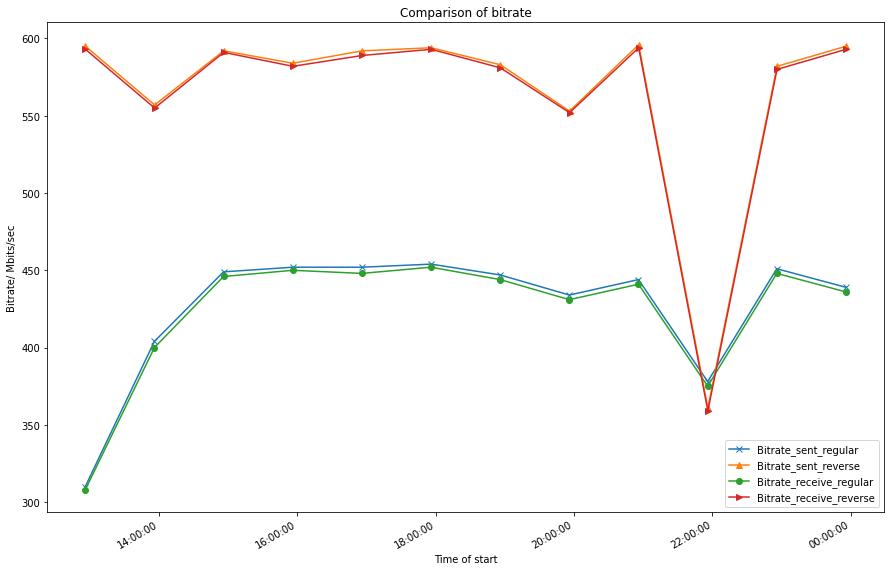

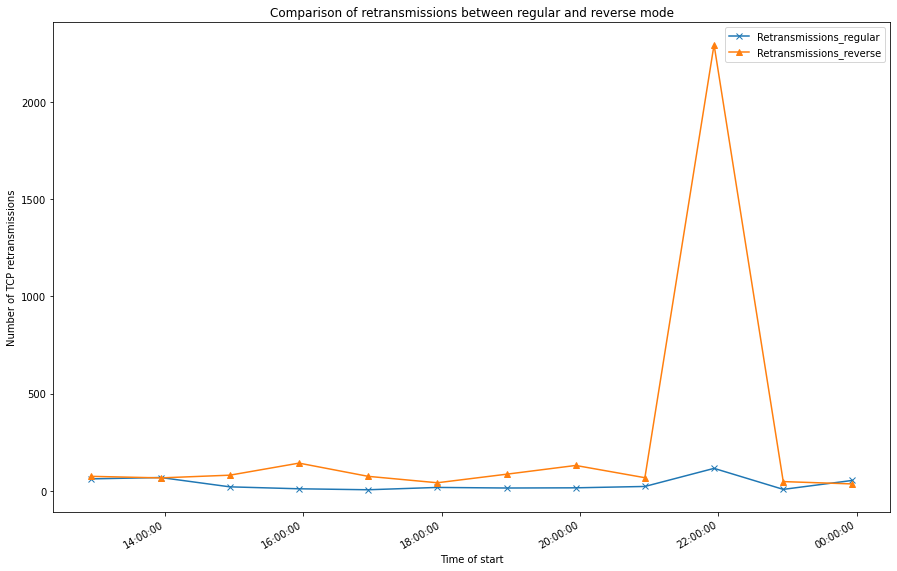

In [29]:
# 3.3 graph comparing bitrate and retransmissions
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
bitrate_sent_0 = []
bitrate_receive_0 = []
bitrate_sent_1 = []
bitrate_receive_1 = []
retransmission_0 = []
retransmission_1 = []
time_regular_axis = []
time_reverse_axis = []
data = pd.read_csv('final.csv')
for line in range(0, len(data)):
    #for regular direction
    if data.iloc[line, 3] == 0:
        bitrate_sent_0.append(data.iloc[line, 7])
        bitrate_receive_0.append(data.iloc[line, 8])
        retransmission_0.append(data.iloc[line, 9])
        time_regular_axis.append(datetime.datetime.fromtimestamp(data.iloc[line, 0]))
    #for reverse direction
    else:
        bitrate_sent_1.append(data.iloc[line, 7])
        bitrate_receive_1.append(data.iloc[line, 8])
        retransmission_1.append(data.iloc[line, 9])
        time_reverse_axis.append(datetime.datetime.fromtimestamp(data.iloc[line, 0]))
fig = plt.figure(figsize=(15, 10))
plt.plot(time_regular_axis, bitrate_sent_0, label='Bitrate_sent_regular', marker='x')
plt.plot(time_reverse_axis, bitrate_sent_1, label='Bitrate_sent_reverse', marker='^')
plt.plot(time_regular_axis, bitrate_receive_0, label='Bitrate_receive_regular', marker='o')
plt.plot(time_reverse_axis, bitrate_receive_1, label='Bitrate_receive_reverse', marker='>')
plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M:%S')
plt.gca().xaxis.set_major_formatter(myFmt)
plt.title('Comparison of bitrate')
plt.ylabel('Bitrate/ Mbits/sec')
plt.xlabel('Time of start')
plt.legend()

fig = plt.figure(figsize=(15, 10))
plt.plot(time_regular_axis, retransmission_0, label='Retransmissions_regular', marker='x')
plt.plot(time_reverse_axis, retransmission_1, label='Retransmissions_reverse', marker='^')
plt.gcf().autofmt_xdate()
myFmt = mdates.DateFormatter('%H:%M:%S')
plt.gca().xaxis.set_major_formatter(myFmt)
plt.title('Comparison of retransmissions between regular and reverse mode')
plt.ylabel('Number of TCP retransmissions')
plt.xlabel('Time of start')
plt.legend()